In [ ]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#from category_encoders import BinaryEncoder
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier,ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.feature_selection import SelectKBest,mutual_info_classif
from sklearn.preprocessing import StandardScaler,LabelEncoder,PowerTransformer
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import zscore
import warnings
warnings.filterwarnings('ignore')


In [ ]:
#loading data
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/Automobile_insurance_fraud.csv')

In [ ]:
df[df.columns[:20]]

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,25-01-2015,Single Vehicle Collision,Side Collision
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,21-01-2015,Vehicle Theft,?
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,22-02-2015,Multi-vehicle Collision,Rear Collision
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,10-01-2015,Single Vehicle Collision,Front Collision
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,17-02-2015,Vehicle Theft,?
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,FEMALE,Masters,craft-repair,paintball,unmarried,0,0,22-02-2015,Single Vehicle Collision,Front Collision
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,FEMALE,PhD,prof-specialty,sleeping,wife,70900,0,24-01-2015,Single Vehicle Collision,Rear Collision
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,FEMALE,Masters,armed-forces,bungie-jumping,other-relative,35100,0,23-01-2015,Multi-vehicle Collision,Side Collision
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,MALE,Associate,handlers-cleaners,base-jumping,wife,0,0,26-02-2015,Single Vehicle Collision,Rear Collision


In [ ]:
df[df.columns[20:]]

,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Minor Damage,Fire,NC,Northbrook,6045 Andromedia St,20,1,YES,0,1,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,Major Damage,Fire,SC,Northbend,3092 Texas Drive,23,1,YES,2,3,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,Minor Damage,Police,NC,Arlington,7629 5th St,4,3,?,2,3,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,Major Damage,Other,NY,Arlington,6128 Elm Lane,2,1,?,0,1,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


In [ ]:
#check meatadata
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [ ]:
#check null values
df.isna().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [ ]:
df.drop(columns=['_c39','policy_number'],axis=1,inplace=True)

In [ ]:
#check unique values and their vlaue count
for  i in df.columns:
  print('-'*15)
  print(df[i].value_counts())

---------------
194    8
128    7
254    7
140    7
210    7
      ..
390    1
411    1
453    1
448    1
17     1
Name: months_as_customer, Length: 391, dtype: int64
---------------
43    49
39    48
41    45
34    44
38    42
30    42
31    42
37    41
33    39
40    38
32    38
29    35
46    33
42    32
35    32
36    32
44    32
28    30
26    26
45    26
48    25
47    24
27    24
57    16
25    14
55    14
49    14
53    13
50    13
24    10
54    10
61    10
51     9
60     9
58     8
56     8
23     7
21     6
59     5
62     4
52     4
64     2
63     2
19     1
20     1
22     1
Name: age, dtype: int64
---------------
01-01-2006    3
28-04-1992    3
05-08-1992    3
14-12-1991    2
09-08-2004    2
             ..
03-06-2014    1
12-12-1998    1
18-02-1999    1
30-10-1997    1
11-11-1996    1
Name: policy_bind_date, Length: 951, dtype: int64
---------------
OH    352
IL    338
IN    310
Name: policy_state, dtype: int64
---------------
250/500     351
100/300     349
500/1000  

policy deductible,number_of_vehicles_involved,bodily_injuries and witnesses has int datatype but they are not continuous

In [ ]:
#statistical analysis
df.describe()

,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000
std,115.113174,9.140287,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861
min,0.000000,19.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000
25%,115.750000,32.000000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000
50%,199.500000,38.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000
75%,276.250000,44.000000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000
max,479.000000,64.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000


data dispersion is good
may be there is a problem in captiral gain as it has median 0

In [ ]:
#listing continuous features
cont_f=[]
for i in df.columns:
  if df[i].dtype=='float64' or df[i].dtype=='int64':
    cont_f.append(i)

In [ ]:
#deleting categorical features from contiuous feature list
for i in ['policy_deductable','number_of_vehicles_involved','bodily_injuries','witnesses']:
  cont_f.remove(i)

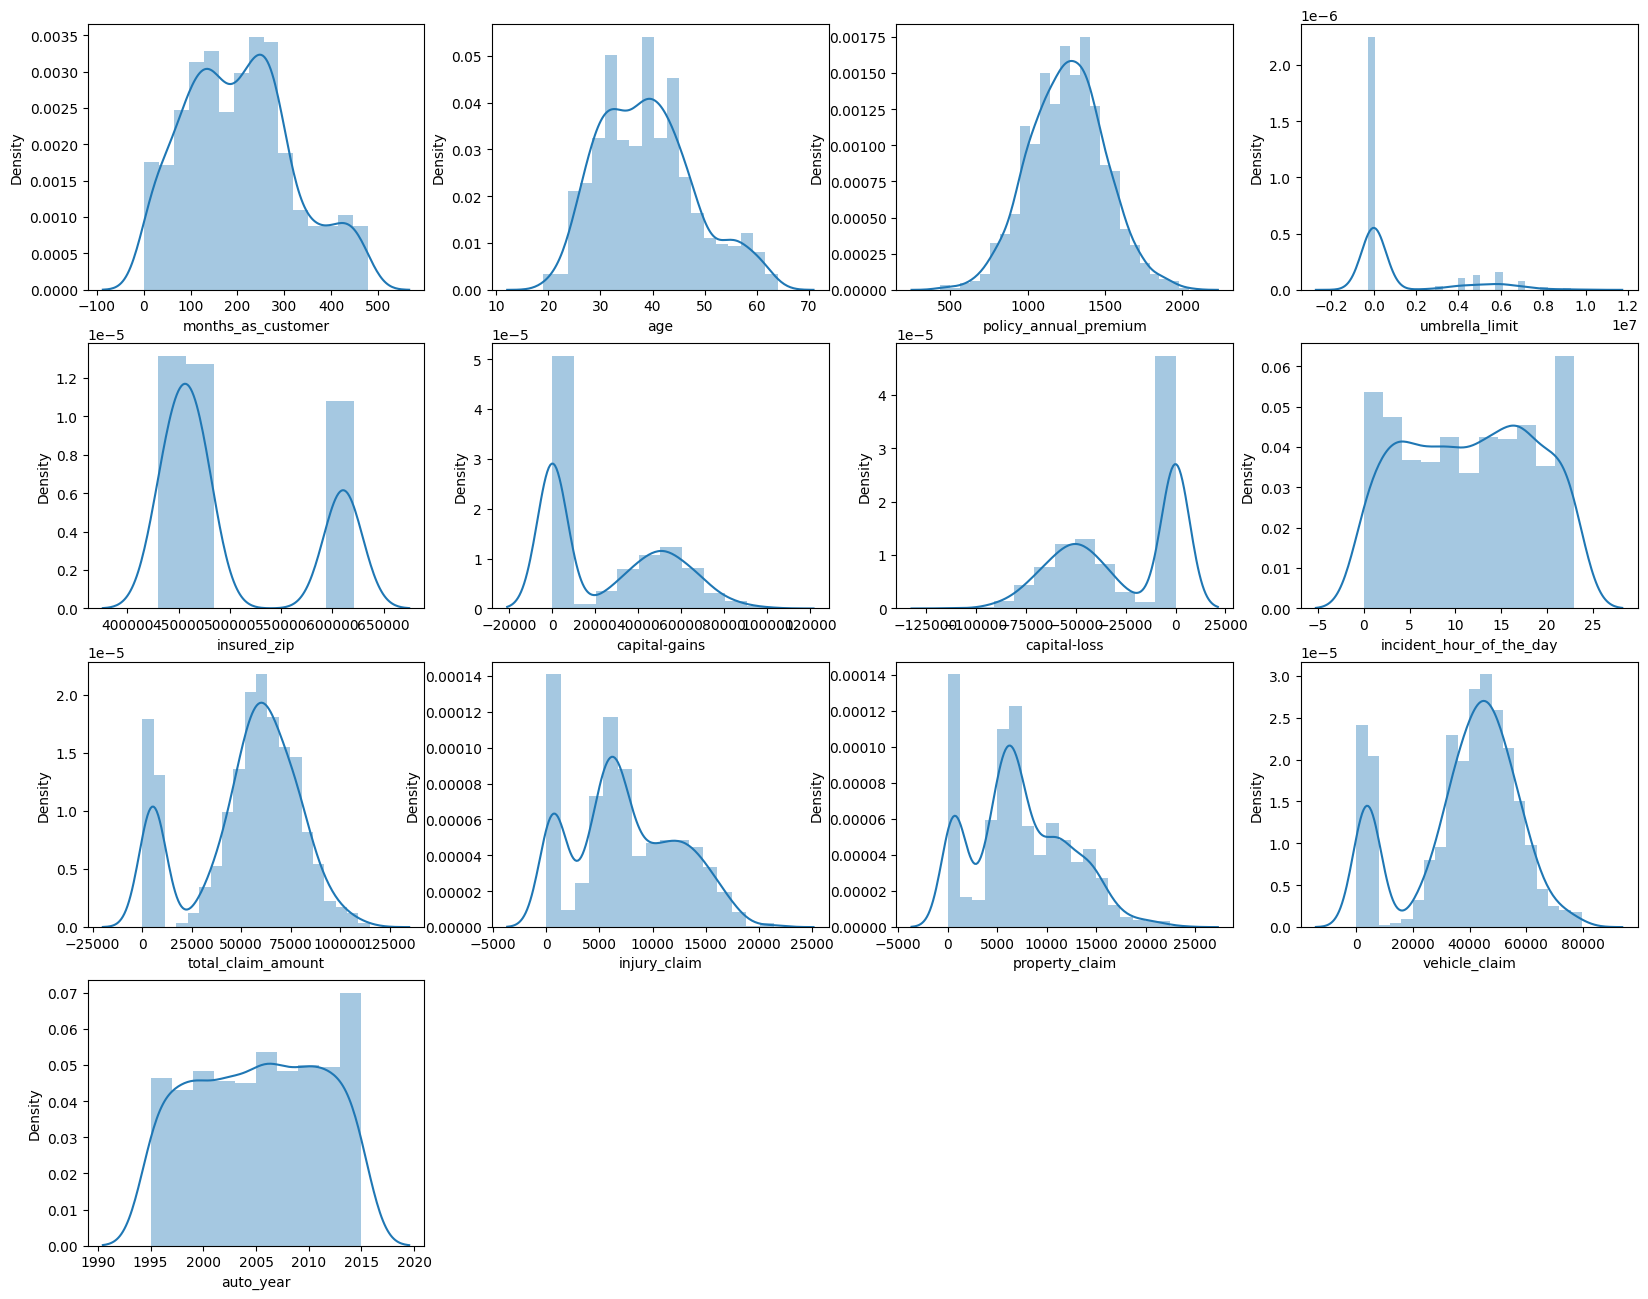

In [ ]:
#ploting distribution
plt.figure(figsize=(20,20))
plotno=1
for i in cont_f:
  plt.subplot(5,4,plotno)
  sns.distplot(df[i])
  plt.xlabel(i)
  plotno+=1
plt.show()

umbrella_limit,insured_zip,capital-gains,capital-loss not distributed well  
capital-gains and umbrella_limit are right skewed  
capital-loss is left skewed

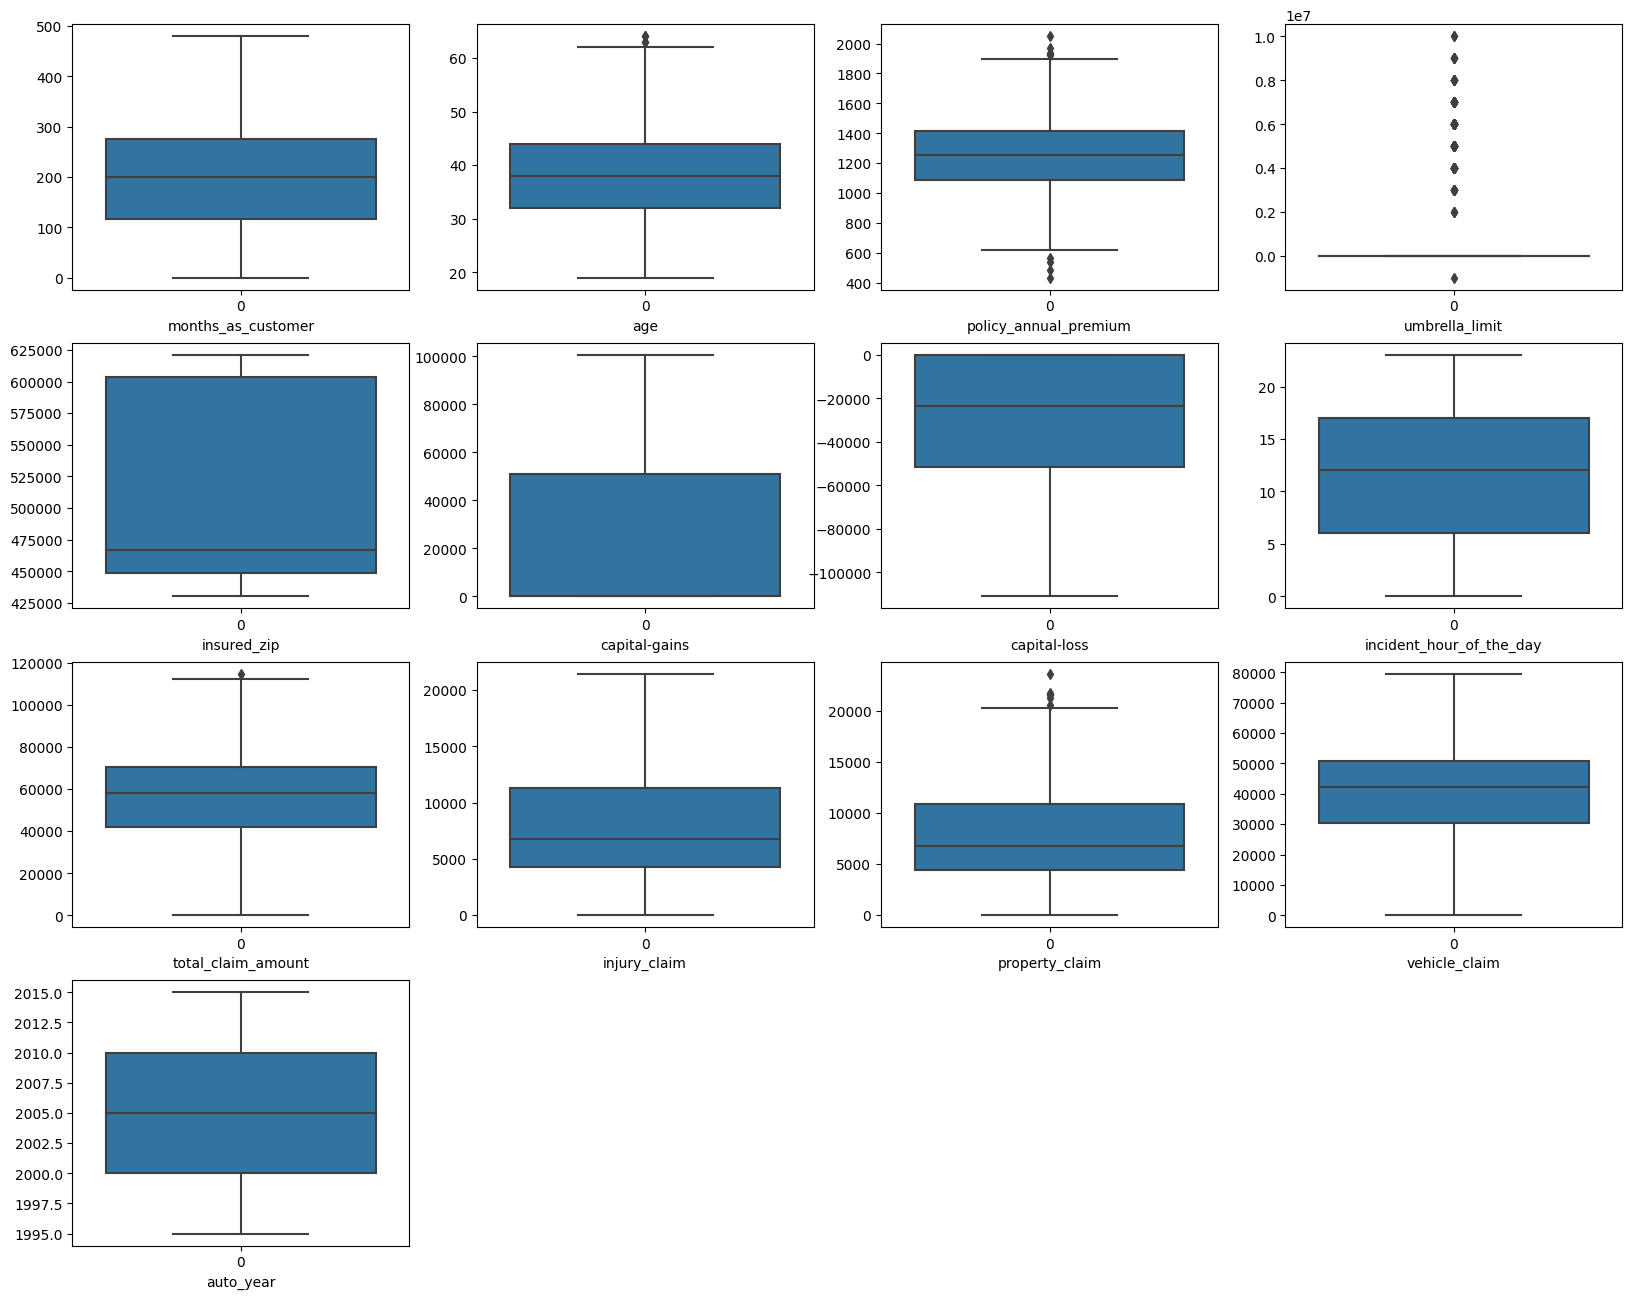

In [ ]:
#check outliers
plt.figure(figsize=(20,20))
plotno=1
for i in cont_f:
  plt.subplot(5,4,plotno)
  sns.boxplot(df[i])
  plt.xlabel(i)
  plotno+=1
plt.show()

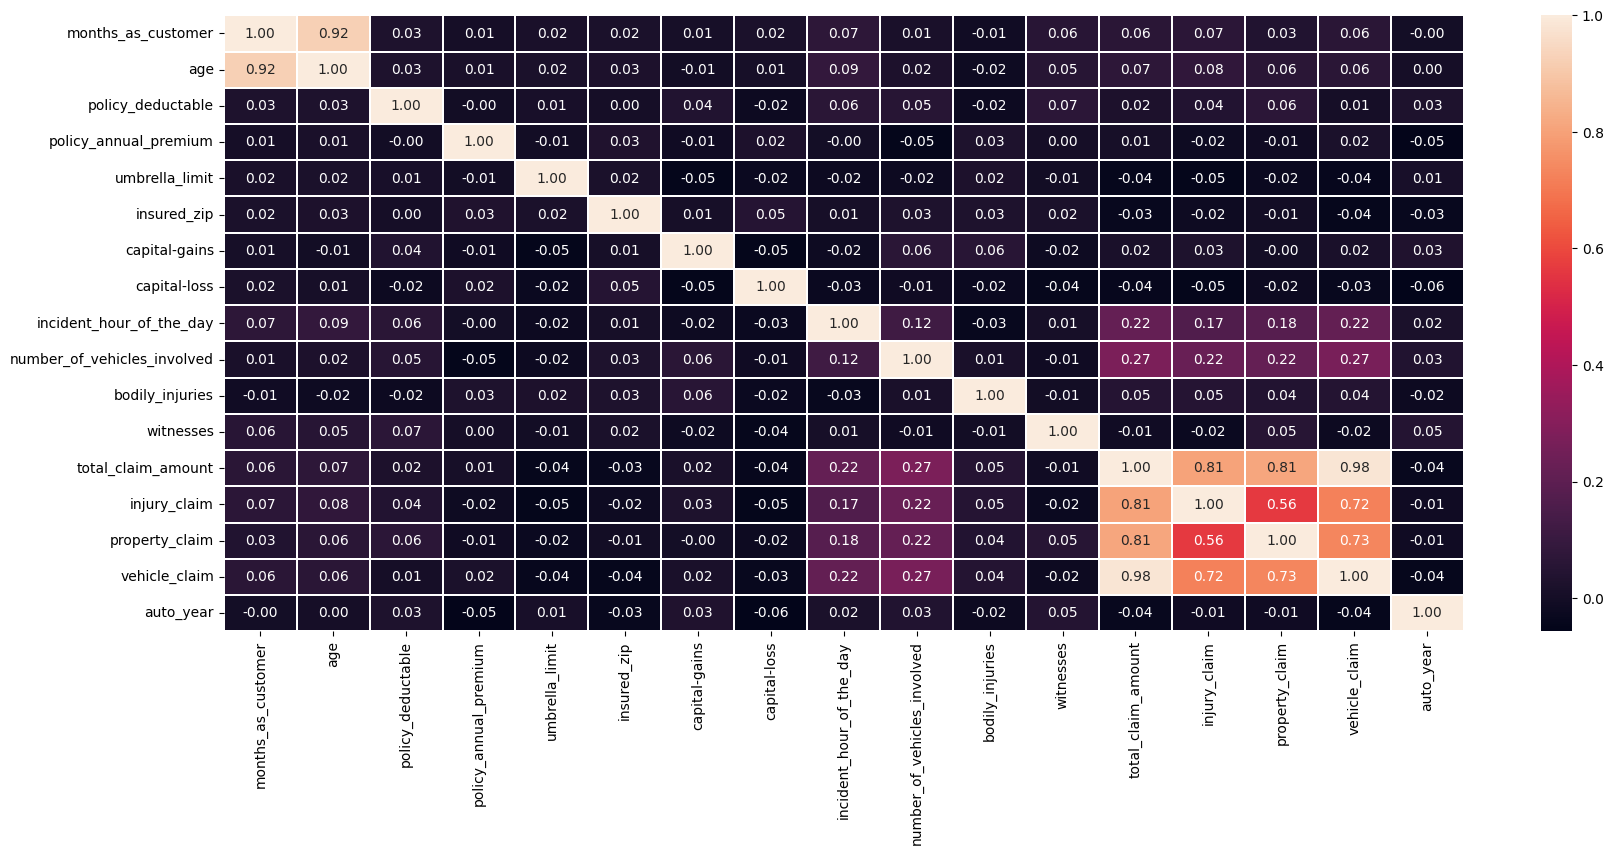

In [ ]:
#chek correlation
plt.figure(figsize=(20,8))
sns.heatmap(df.corr(),annot=True,fmt='.2f',linewidths=0.1)
plt.show()

total_claim_amount has high positive correlation with vehical_claim,prperty_calim,injury_claim  
injury_claim has high positive correlation with vehical_claim,prperty_calim  
prperty_claim has high positive correlation with vehical_claim  
all bove mentioned features are highly correlated with each other

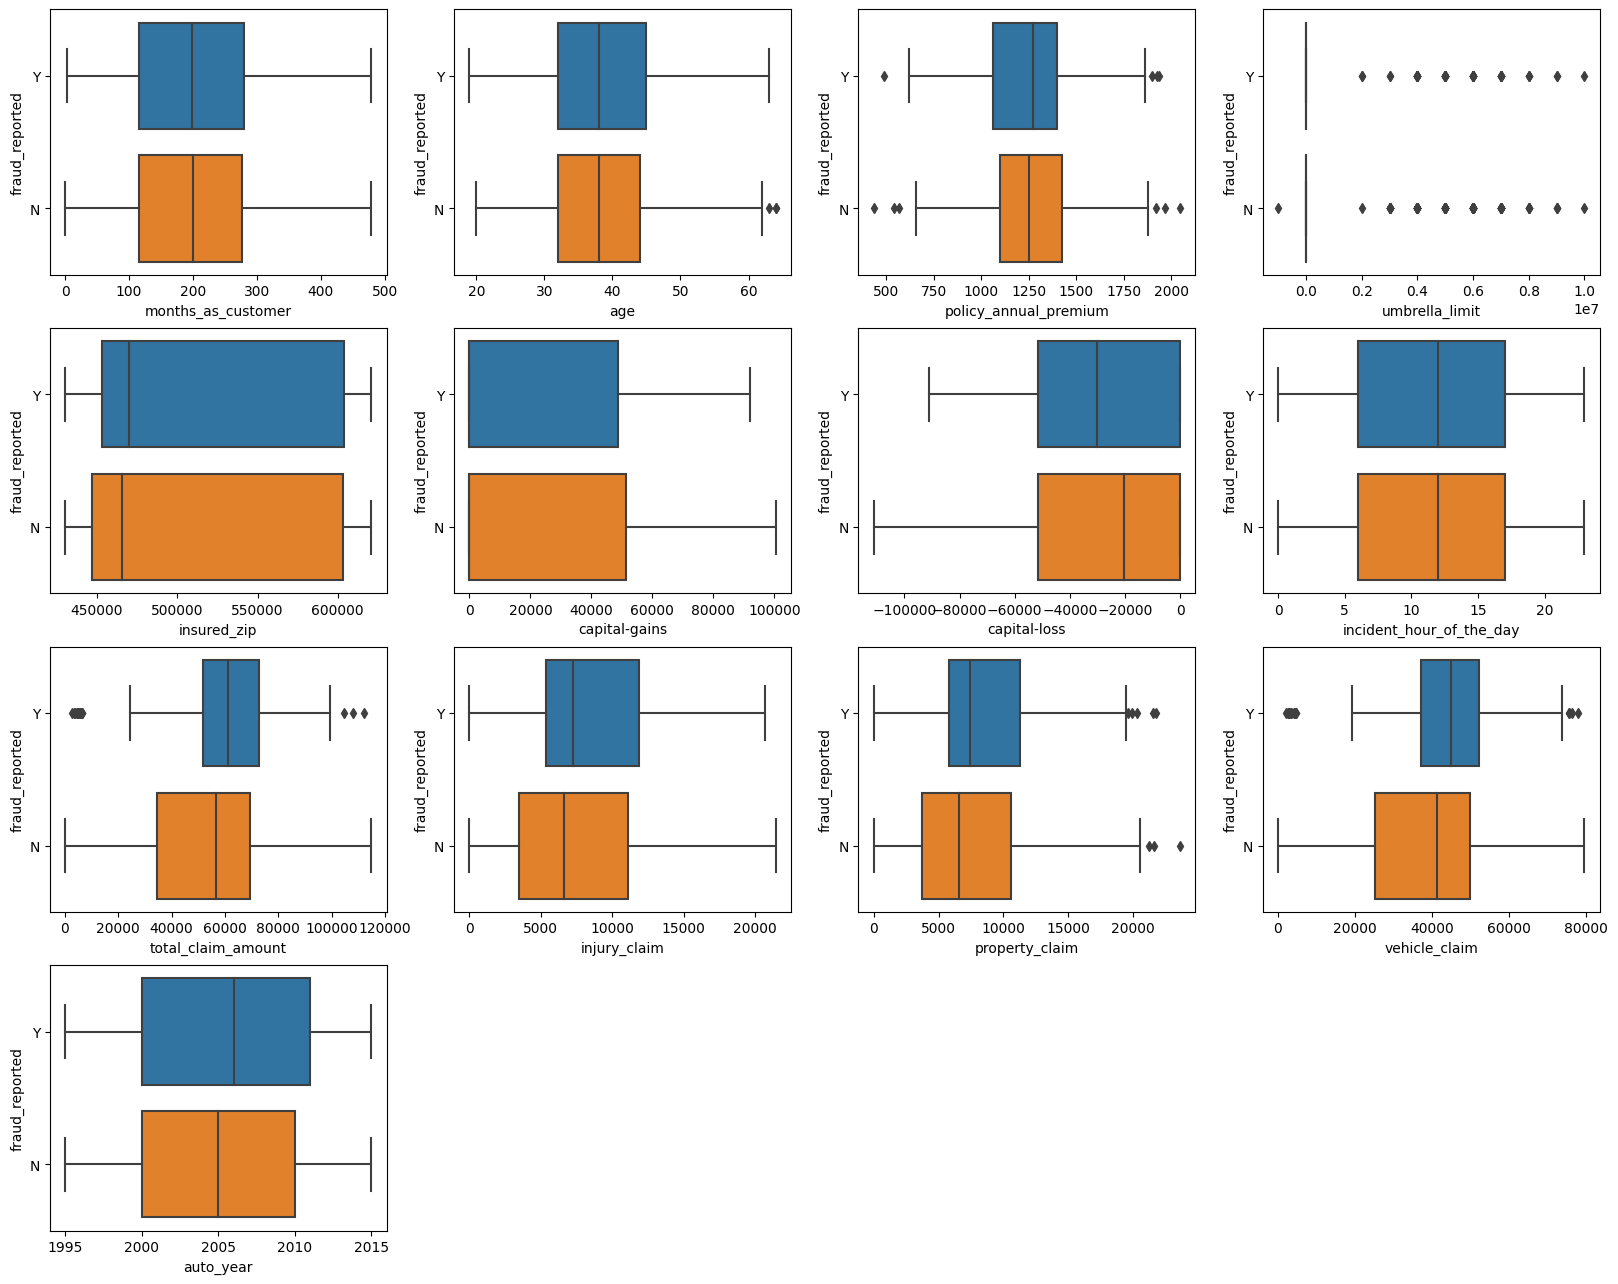

In [ ]:
#ploting relation of continuous features with label
plt.figure(figsize=(20,20))
plotno=1
for i in cont_f:
  plt.subplot(5,4,plotno)
  sns.boxplot(x=df[i],y=df['fraud_reported'])
  plt.xlabel(i)
  plotno+=1
plt.show()

each conituous feature has similer range for fraud reoprted yes or no

<Axes: xlabel='insured_sex', ylabel='count'>

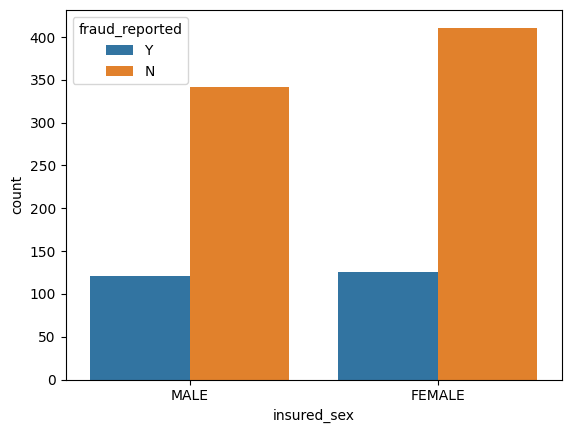

In [ ]:
#check most fraud done by which gender
sns.countplot(data=df,hue=df['fraud_reported'],x=df['insured_sex'])

<Axes: xlabel='fraud_reported', ylabel='count'>

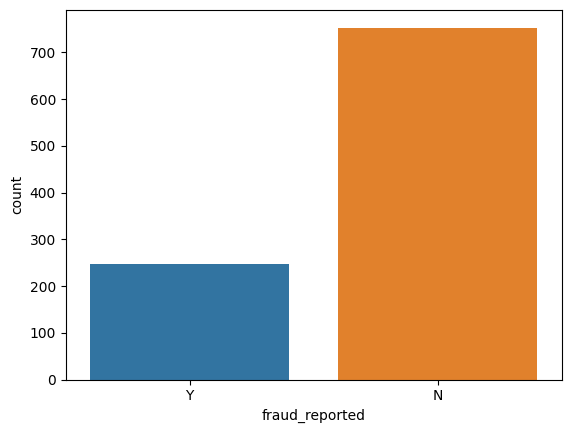

In [ ]:
#check class balance
sns.countplot(x=df['fraud_reported'])

slightly male's are doing more fraud as compare to

<Axes: xlabel='number_of_vehicles_involved', ylabel='count'>

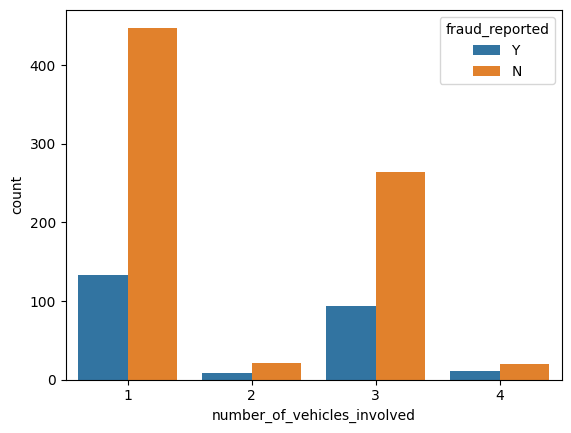

In [ ]:
#check raito of no of vehicale invovled in fraud or not
sns.countplot(data=df,x=df['number_of_vehicles_involved'],hue=df['fraud_reported'])

<Axes: xlabel='insured_education_level', ylabel='count'>

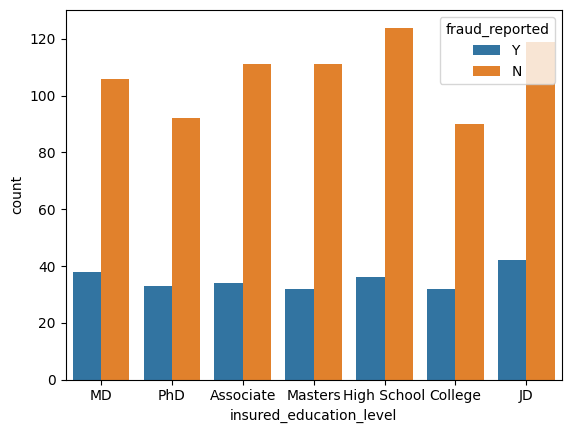

In [ ]:
#check raito of educational level and fraud
sns.countplot(data=df,x=df['insured_education_level'],hue=df['fraud_reported'])

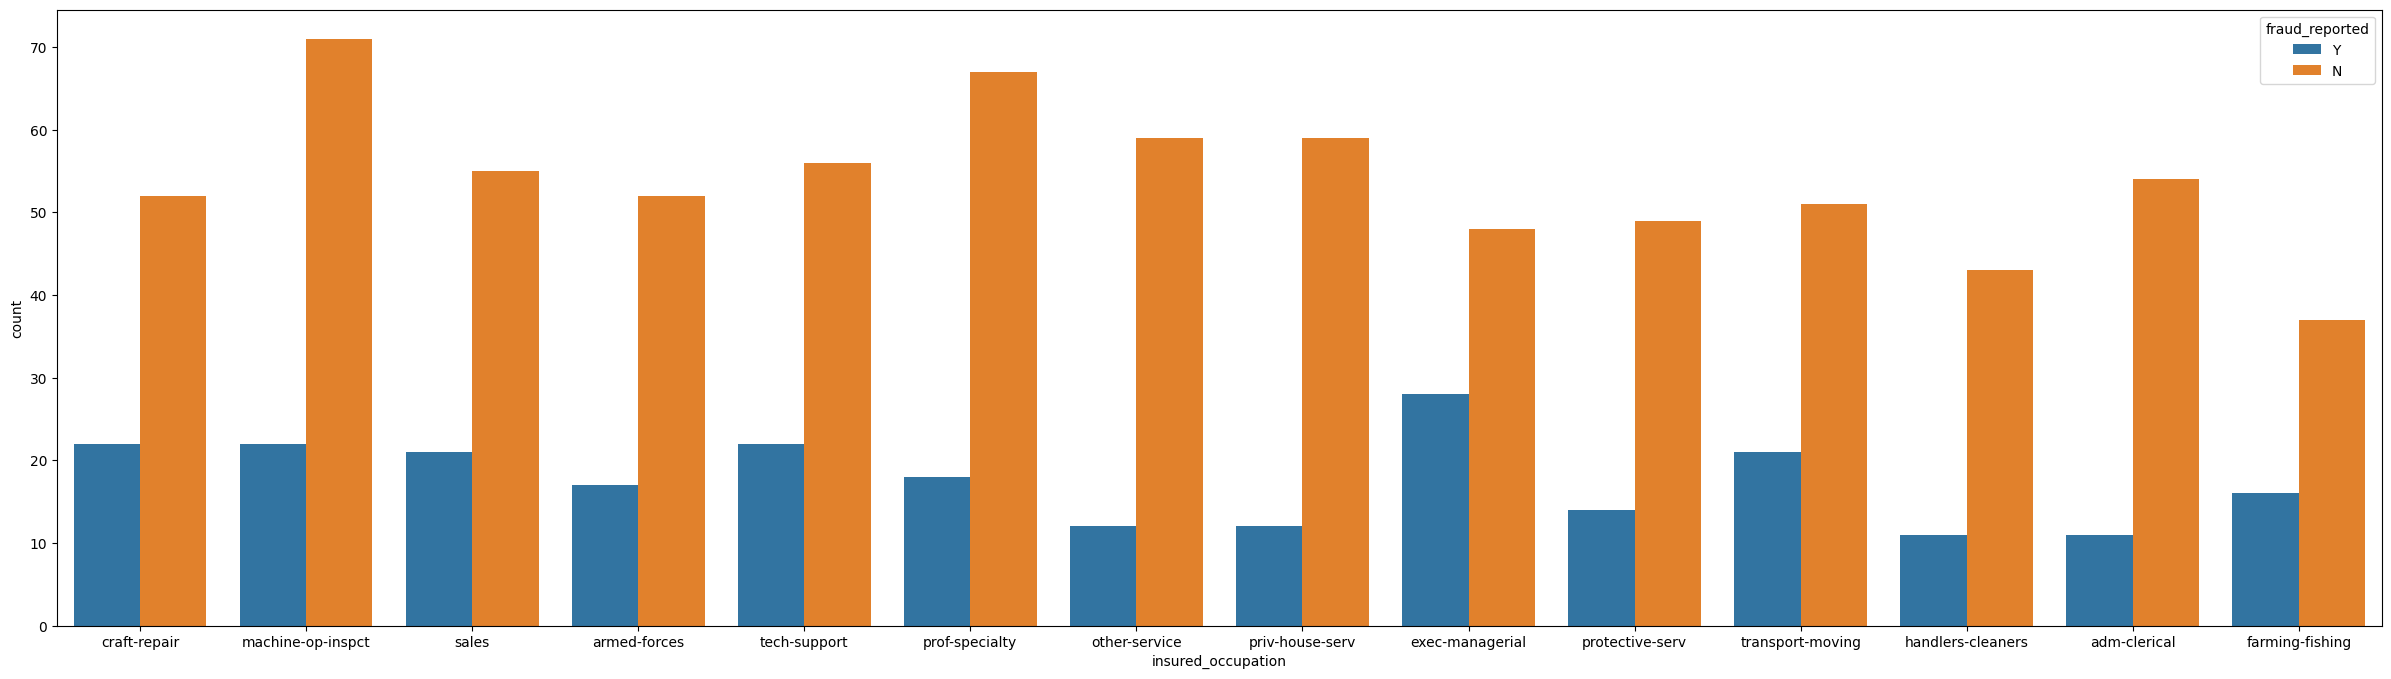

In [ ]:
#check which occuption is involved more in fraud
plt.figure(figsize=(30,8))
sns.countplot(data=df,x=df['insured_occupation'],hue=df['fraud_reported'])
plt.show()

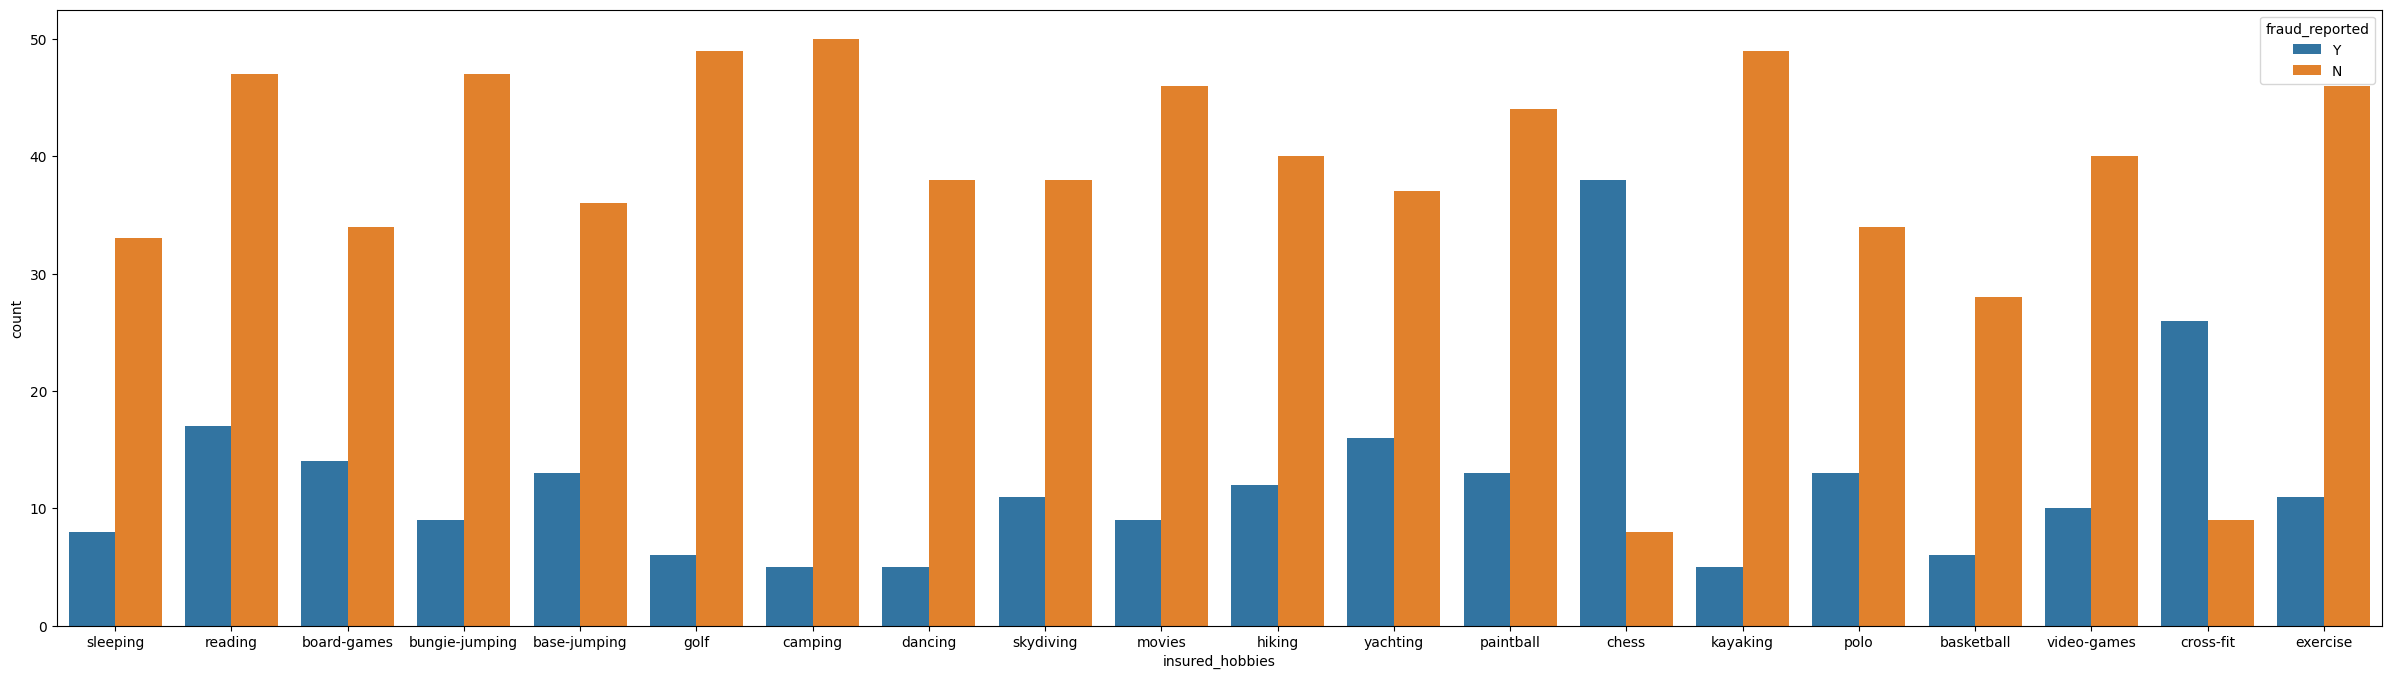

In [ ]:
#check fraud pepoles hobby
plt.figure(figsize=(30,8))
sns.countplot(data=df,x=df['insured_hobbies'],hue=df['fraud_reported'])
plt.show()

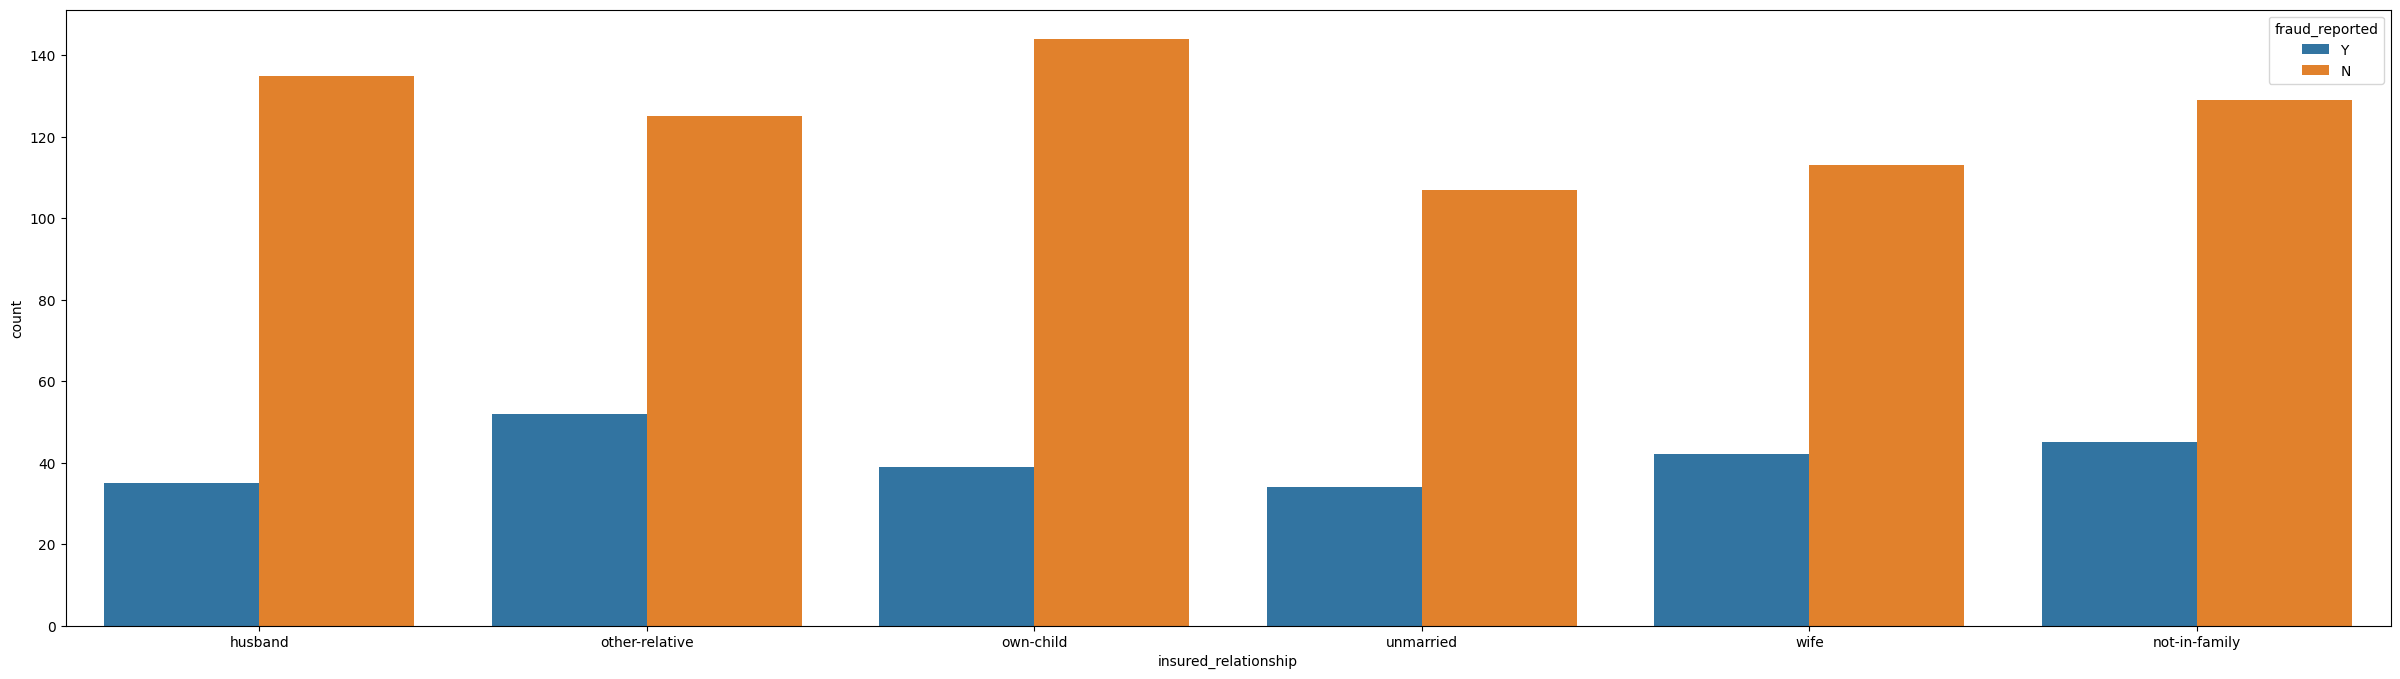

In [ ]:
#check fraud pepoles relationship status
plt.figure(figsize=(30,8))
sns.countplot(data=df,x=df['insured_relationship'],hue=df['fraud_reported'])
plt.show()

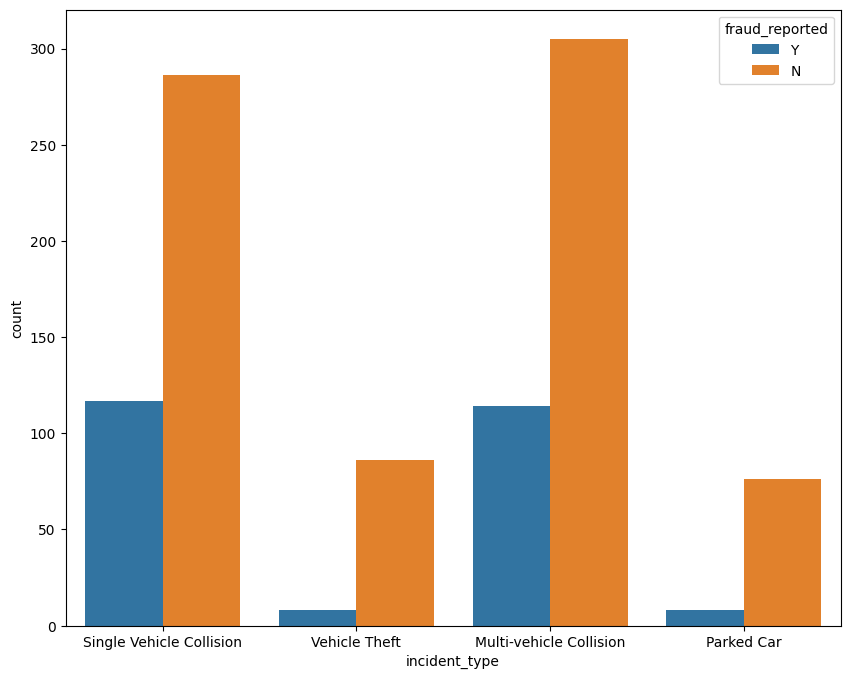

In [ ]:
#check which incident type oftenly reported as fraud
plt.figure(figsize=(10,8))
sns.countplot(data=df,x=df['incident_type'],hue=df['fraud_reported'])
plt.show()

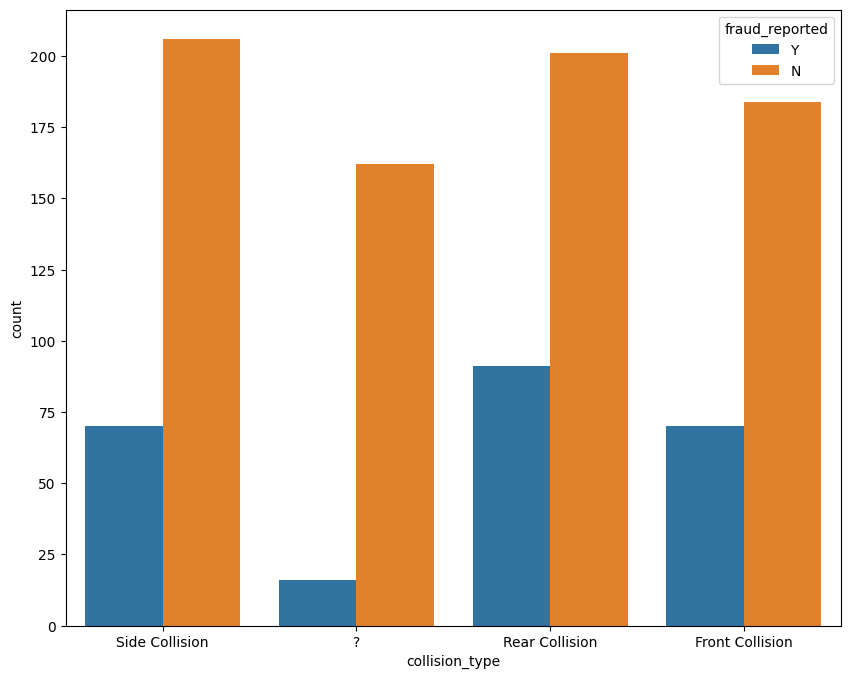

In [ ]:
#check which collision_type oftenly reported as fraud
plt.figure(figsize=(10,8))
sns.countplot(data=df,x=df['collision_type'],hue=df['fraud_reported'])
plt.show()

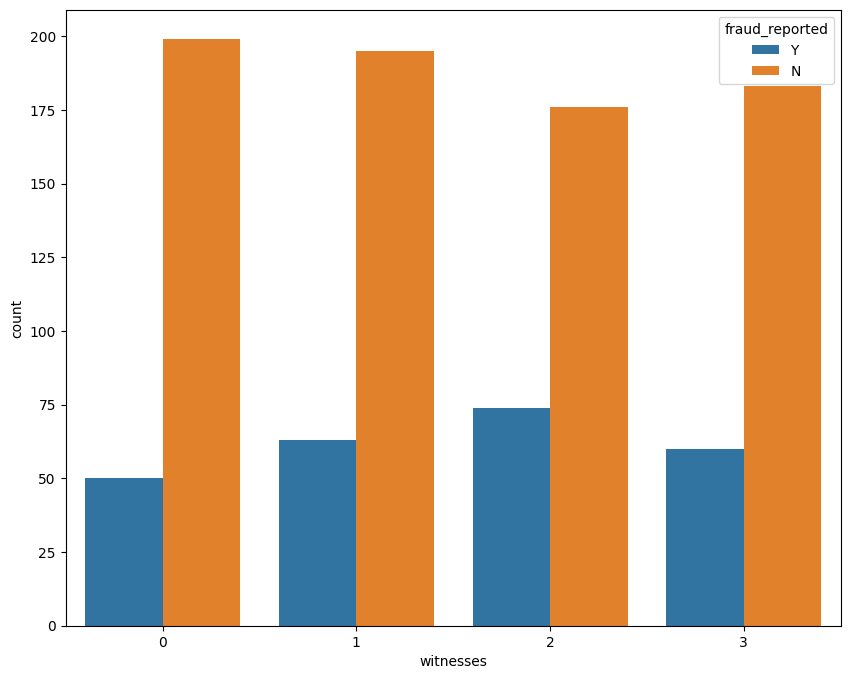

In [ ]:
#check how witnesses effect fraud report
plt.figure(figsize=(10,8))
sns.countplot(data=df,x=df['witnesses'],hue=df['fraud_reported'])
plt.show()

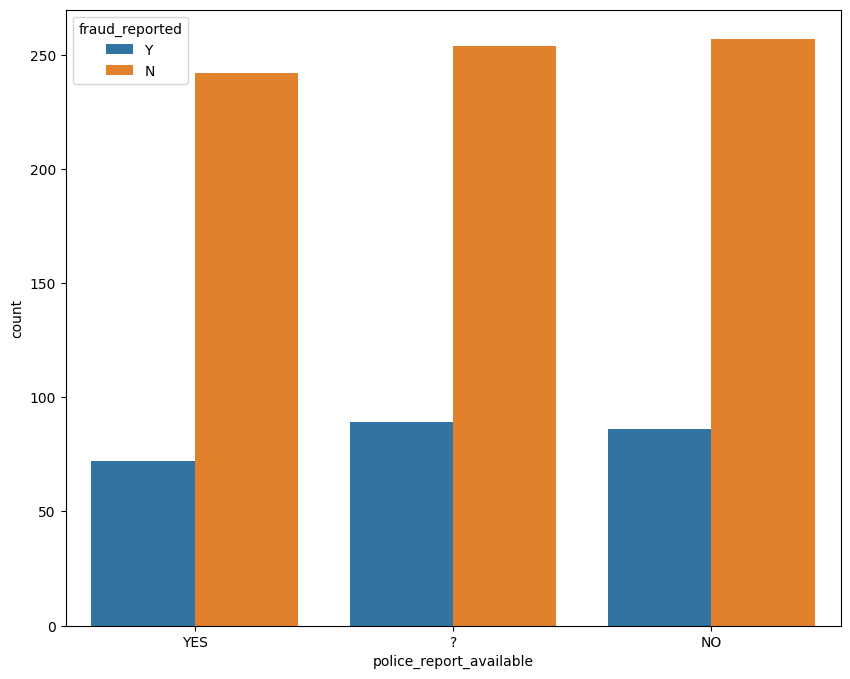

In [ ]:
#check if police report how affecting fraud ratio
plt.figure(figsize=(10,8))
sns.countplot(data=df,x=df['police_report_available'],hue=df['fraud_reported'])
plt.show()

In [ ]:
#removing outliers
zscr=zscore(df[['vehicle_claim','total_claim_amount','property_claim','age','policy_annual_premium','umbrella_limit']])
abs_zscr=np.abs(zscr)
outliers_removed_df=(abs_zscr < 3.5).all(axis=1)
df=df[outliers_removed_df]

In [ ]:
#listing categorical features
cat_f=[]
for column in df.columns:
    if df[column].dtype == 'object':
        cat_f.append(column)


In [ ]:
#check skewness
df.skew()

months_as_customer             0.364821
age                            0.483327
policy_deductable              0.479645
policy_annual_premium          0.001920
umbrella_limit                 1.791312
insured_zip                    0.818441
capital-gains                  0.478023
capital-loss                  -0.396298
incident_hour_of_the_day      -0.032956
number_of_vehicles_involved    0.505273
bodily_injuries                0.012959
witnesses                      0.019685
total_claim_amount            -0.593663
injury_claim                   0.262198
property_claim                 0.378191
vehicle_claim                 -0.619937
auto_year                     -0.051743
dtype: float64

In [ ]:
skewF=df.skew().index.tolist()

In [ ]:
#feature encoding
encoder=LabelEncoder()
for i in cat_f:
  df[i]=encoder.fit_transform(df[i])

In [ ]:
skewed_featire=skewF
pwt=PowerTransformer(method='yeo-johnson')
df[skewed_featire]=pwt.fit_transform(df[skewed_featire])


In [ ]:
# #removing skewness based on skewness score
# for i in skewF:
#   if df[i].skew() > 0.5:
#     df[i]=np.cbrt(df[i])
#   elif df[i].skew() < -0.5:
#     df[i]=np.sqrt(df[i])
#   else:
#     continue

In [ ]:
df.skew()

months_as_customer            -0.135233
age                           -0.001677
policy_bind_date               0.005359
policy_state                  -0.026252
policy_csl                     0.087309
policy_deductable              0.024752
policy_annual_premium          0.004412
umbrella_limit                -7.880622
insured_zip                    0.000000
insured_sex                    0.148930
insured_education_level        0.001352
insured_occupation            -0.058735
insured_hobbies               -0.059765
insured_relationship           0.075966
capital-gains                  0.038787
capital-loss                   0.086757
incident_date                  0.005858
incident_type                  0.097795
collision_type                -0.193567
incident_severity              0.283286
authorities_contacted         -0.121983
incident_state                -0.152578
incident_city                  0.050421
incident_location              0.000000
incident_hour_of_the_day      -0.256253


In [ ]:
#split feature and label
X=df.drop('fraud_reported',axis=1)
y=df['fraud_reported']

In [ ]:
#check multicolliniearity
vif=pd.DataFrame()
vif['features']=X.columns
vif['Score']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif

,features,Score
0,months_as_customer,4.673954
1,age,4.684087
2,policy_bind_date,3.869614
3,policy_state,2.492307
4,policy_csl,2.422349
5,policy_deductable,1.034178
6,policy_annual_premium,1.041972
7,umbrella_limit,1.032051
8,insured_zip,1.041256
9,insured_sex,1.892303


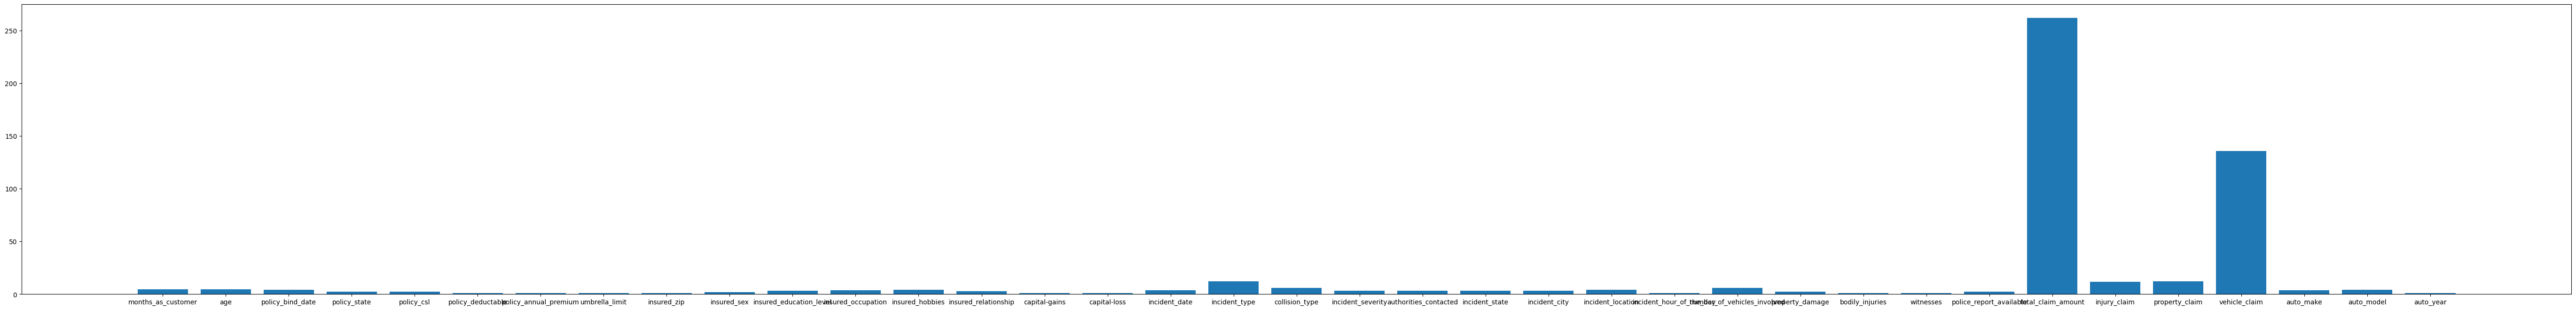

In [ ]:
#plot vif score
plt.figure(figsize=(70,8))
plt.bar(vif['features'],vif['Score'])
plt.show()

In [ ]:
# X.drop(columns=['total_claim_amount','vehicle_claim'],axis=1,inplace=True)

In [ ]:
#feature selection
selectkbest=SelectKBest(score_func=mutual_info_classif,k=25)
x_best=selectkbest.fit_transform(X,y)

In [ ]:
best=pd.DataFrame()
best['features']=X.columns
best['score']=selectkbest.scores_
best

,features,score
0,months_as_customer,0.000000
1,age,0.000000
2,policy_bind_date,0.019817
3,policy_state,0.008708
4,policy_csl,0.000000
5,policy_deductable,0.020708
6,policy_annual_premium,0.012044
7,umbrella_limit,0.014678
8,insured_zip,0.004864
9,insured_sex,0.000000


In [ ]:
#feature scaling
scal=StandardScaler()
x_scal=scal.fit_transform(x_best)

In [ ]:
#find random state that split data well
def random_state(alg,x,y):
  maxscore,ind=0,0
  for i in range(100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=i)
    alg.fit(x_train,y_train)
    randompred=alg.predict(x_test)
    score=accuracy_score(y_test,randompred)
    if score > maxscore:
      maxscore=score
      ind=i
  return maxscore,ind

In [ ]:
maxscore,random_state=random_state(LogisticRegression(),x_scal,y)
print(f'maxscore {maxscore} at random state {random_state}')

maxscore 0.828 at random state 90


In [ ]:
#spliting training and testing data
x_train,x_test,y_train,y_test=train_test_split(x_scal,y,test_size=0.25,random_state=random_state)

In [ ]:
#deining method for training/building model
def build_model(alg,x_train,x_test,y_train,y_test):
  alg.fit(x_train,y_train)
  print('-'*10,'Training Score','-'*10)
  train_score,test_score=None,None
  train_pred=alg.predict(x_train)
  train_score=accuracy_score(y_train,train_pred)
  print(train_score)
  print('\n','-'*10,'Testing Score','-'*10)
  test_pred,test_score=None,None
  test_pred=alg.predict(x_test)
  test_score=accuracy_score(y_test,test_pred)
  print(test_score)
  print('-'*10,'Confusion Matrix','-'*10)
  print(confusion_matrix(y_test,test_pred))
  return alg,test_score


In [ ]:
#building logisticregression
lc,lcTestScore=build_model(LogisticRegression(),x_train,x_test,y_train,y_test)

---------- Training Score ----------
0.8021390374331551

 ---------- Testing Score ----------
0.828
---------- Confusion Matrix ----------
[[178  12]
 [ 31  29]]


In [ ]:
#building svc
svc,svcTestScore=build_model(SVC(probability=True),x_train,x_test,y_train,y_test)

---------- Training Score ----------
0.8596256684491979

 ---------- Testing Score ----------
0.768
---------- Confusion Matrix ----------
[[189   1]
 [ 57   3]]


In [ ]:
#building kneighbors
knc,kncTestScore=build_model(KNeighborsClassifier(),x_train,x_test,y_train,y_test)

---------- Training Score ----------
0.8048128342245989

 ---------- Testing Score ----------
0.712
---------- Confusion Matrix ----------
[[168  22]
 [ 50  10]]


In [ ]:
#building decisiontreeclassifier
dtc,dtcTestScore=build_model(DecisionTreeClassifier(),x_train,x_test,y_train,y_test)

---------- Training Score ----------
1.0

 ---------- Testing Score ----------
0.804
---------- Confusion Matrix ----------
[[161  29]
 [ 20  40]]


In [ ]:
#building ExtraTreeClassifier
etc,etcTestScore=build_model(ExtraTreeClassifier(),x_train,x_test,y_train,y_test)

---------- Training Score ----------
1.0

 ---------- Testing Score ----------
0.708
---------- Confusion Matrix ----------
[[152  38]
 [ 35  25]]


In [ ]:
#building RandomForestClassifier
rfc,rfcTestScore=build_model(RandomForestClassifier(),x_train,x_test,y_train,y_test)

---------- Training Score ----------
1.0

 ---------- Testing Score ----------
0.804
---------- Confusion Matrix ----------
[[178  12]
 [ 37  23]]


In [ ]:
#building AdaBoostClassifier
abc,abcTestScore=build_model(AdaBoostClassifier(),x_train,x_test,y_train,y_test)

---------- Training Score ----------
0.8676470588235294

 ---------- Testing Score ----------
0.8
---------- Confusion Matrix ----------
[[172  18]
 [ 32  28]]


In [ ]:
#building GradientBoostingClassifier
gbc,gbTestScore=build_model(GradientBoostingClassifier(),x_train,x_test,y_train,y_test)

---------- Training Score ----------
0.9719251336898396

 ---------- Testing Score ----------
0.868
---------- Confusion Matrix ----------
[[174  16]
 [ 17  43]]


In [ ]:
#building XGBClassifier
xgb,xgbTestScore=build_model(XGBClassifier(),x_train,x_test,y_train,y_test)

---------- Training Score ----------
1.0

 ---------- Testing Score ----------
0.832
---------- Confusion Matrix ----------
[[173  17]
 [ 25  35]]


In [ ]:
#cross validation
def crosscheck(alg,test_score=None):
  cv=cross_val_score(alg,x_train,y_train)
  cvmean=round(((cv.mean())*100),2)
  testing_score=round(test_score*100,2)
  print('-'*63)
  print('|  ',cv,' |')
  print('-'*63)
  print('|  cv.mean    |    testing score    |         difference      |')
  print('-'*63)
  print(f'|  {cvmean}      |          {testing_score}      |           {round(cvmean-testing_score,2)}         |')
  print('-'*63)

In [ ]:
#Cross validation of logisticregression
crosscheck(LogisticRegression(),lcTestScore)

---------------------------------------------------------------
|   [0.78666667 0.76       0.76       0.73154362 0.73154362]  |
---------------------------------------------------------------
|  cv.mean    |    testing score    |         difference      |
---------------------------------------------------------------
|  75.4      |          82.8      |           -7.4         |
---------------------------------------------------------------


In [ ]:
#Cross validation of SVC
crosscheck(SVC(),svcTestScore)

---------------------------------------------------------------
|   [0.74666667 0.74666667 0.74       0.71812081 0.75167785]  |
---------------------------------------------------------------
|  cv.mean    |    testing score    |         difference      |
---------------------------------------------------------------
|  74.06      |          76.8      |           -2.74         |
---------------------------------------------------------------


In [ ]:
#Cross validation of KneighborsClassifier
crosscheck(KNeighborsClassifier(),kncTestScore)

---------------------------------------------------------------
|   [0.72666667 0.74       0.73333333 0.69798658 0.71812081]  |
---------------------------------------------------------------
|  cv.mean    |    testing score    |         difference      |
---------------------------------------------------------------
|  72.32      |          71.2      |           1.12         |
---------------------------------------------------------------


In [ ]:
#Cross validation of DecisionTreeClassifier
crosscheck(DecisionTreeClassifier(),dtcTestScore)

---------------------------------------------------------------
|   [0.76666667 0.76666667 0.76       0.77852349 0.82550336]  |
---------------------------------------------------------------
|  cv.mean    |    testing score    |         difference      |
---------------------------------------------------------------
|  77.95      |          80.4      |           -2.45         |
---------------------------------------------------------------


In [ ]:
#Cross validation of ExtraTreeCLassifier
crosscheck(ExtraTreeClassifier(),etcTestScore)

---------------------------------------------------------------
|   [0.66666667 0.64666667 0.55333333 0.72483221 0.6442953 ]  |
---------------------------------------------------------------
|  cv.mean    |    testing score    |         difference      |
---------------------------------------------------------------
|  64.72      |          70.8      |           -6.08         |
---------------------------------------------------------------


In [ ]:
#Cross validation of RandomForestClassifier
crosscheck(RandomForestClassifier(),rfcTestScore)

---------------------------------------------------------------
|   [0.76666667 0.78       0.71333333 0.75838926 0.76510067]  |
---------------------------------------------------------------
|  cv.mean    |    testing score    |         difference      |
---------------------------------------------------------------
|  75.67      |          80.4      |           -4.73         |
---------------------------------------------------------------


In [ ]:
#Cross validation of AdaBoostClassifier
crosscheck(AdaBoostClassifier(),abcTestScore)

---------------------------------------------------------------
|   [0.77333333 0.77333333 0.77333333 0.74496644 0.82550336]  |
---------------------------------------------------------------
|  cv.mean    |    testing score    |         difference      |
---------------------------------------------------------------
|  77.81      |          80.0      |           -2.19         |
---------------------------------------------------------------


In [ ]:
#Cross validation of GradientBoostingClassifier
crosscheck(GradientBoostingClassifier(),gbTestScore)

---------------------------------------------------------------
|   [0.84       0.78666667 0.80666667 0.83892617 0.81879195]  |
---------------------------------------------------------------
|  cv.mean    |    testing score    |         difference      |
---------------------------------------------------------------
|  81.82      |          86.8      |           -4.98         |
---------------------------------------------------------------


In [ ]:
#Cross validation of XGBCLassifier
crosscheck(XGBClassifier(),xgbTestScore)

---------------------------------------------------------------
|   [0.82       0.77333333 0.81333333 0.79194631 0.83221477]  |
---------------------------------------------------------------
|  cv.mean    |    testing score    |         difference      |
---------------------------------------------------------------
|  80.62      |          83.2      |           -2.58         |
---------------------------------------------------------------


In [ ]:
#calculating probabilities
lc_prob=lc.predict_proba(x_test)[:,1]
svc_prob=svc.predict_proba(x_test)[:,1]
knc_prob=knc.predict_proba(x_test)[:,1]
dt_prob=dtc.predict_proba(x_test)[:,1]
et_prob=etc.predict_proba(x_test)[:,1]
rfc_prob=rfc.predict_proba(x_test)[:,1]
abc_prob=abc.predict_proba(x_test)[:,1]
gbc_prob=gbc.predict_proba(x_test)[:,1]
xgb_prob=xgb.predict_proba(x_test)[:,1]

In [ ]:
#calculating fpr,tpr and threshold
lc_fpr,lc_tpr,lc_threshold=roc_curve(y_test,lc_prob)
svc_fpr,svc_tpr,svc_threshold=roc_curve(y_test,svc_prob)
knc_fpr,knc_tpr,knc_threshold=roc_curve(y_test,knc_prob)
dt_fpr,dt_tpr,dt_threshold=roc_curve(y_test,dt_prob)
et_fpr,et_tpr,et_threshold=roc_curve(y_test,et_prob)
rfc_fpr,rfc_tpr,rfc_threshold=roc_curve(y_test,rfc_prob)
abc_fpr,abc_tpr,abc_threshold=roc_curve(y_test,abc_prob)
gbc_fpr,gbc_tpr,gbc_threshold=roc_curve(y_test,gbc_prob)
xgb_fpr,xgb_tpr,xgb_threshold=roc_curve(y_test,xgb_prob)

In [ ]:
#calculating auc score
lc_auc=roc_auc_score(y_test,lc_prob)
svc_auc=roc_auc_score(y_test,svc_prob)
knc_auc=roc_auc_score(y_test,knc_prob)
dt_auc=roc_auc_score(y_test,dt_prob)
et_auc=roc_auc_score(y_test,et_prob)
rfc_auc=roc_auc_score(y_test,rfc_prob)
abc_auc=roc_auc_score(y_test,abc_prob)
gbc_auc=roc_auc_score(y_test,gbc_prob)
xgb_auc=roc_auc_score(y_test,xgb_prob)

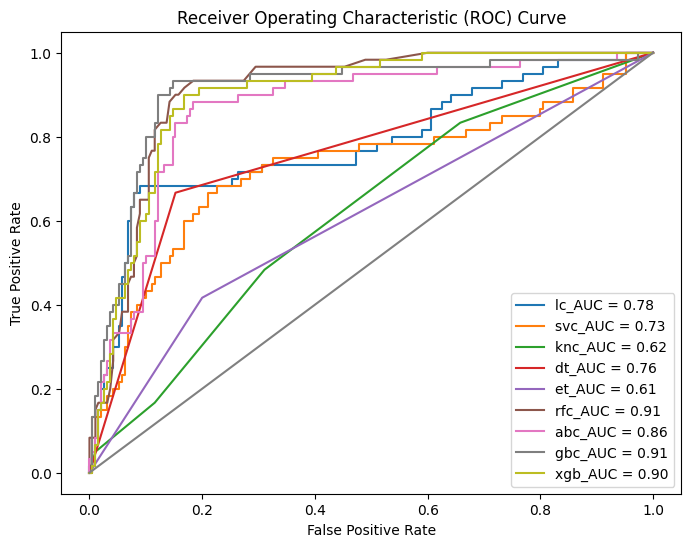

In [ ]:
#ploting roc curve
plt.figure(figsize=(8, 6))
plt.plot(lc_fpr, lc_tpr, label=f'lc_AUC = {lc_auc:.2f}')
plt.plot(svc_fpr, svc_tpr, label=f'svc_AUC = {svc_auc:.2f}')
plt.plot(knc_fpr, knc_tpr, label=f'knc_AUC = {knc_auc:.2f}')
plt.plot(dt_fpr, dt_tpr, label=f'dt_AUC = {dt_auc:.2f}')
plt.plot(et_fpr, et_tpr, label=f'et_AUC = {et_auc:.2f}')
plt.plot(rfc_fpr, rfc_tpr, label=f'rfc_AUC = {rfc_auc:.2f}')
plt.plot(abc_fpr, abc_tpr, label=f'abc_AUC = {abc_auc:.2f}')
plt.plot(gbc_fpr, gbc_tpr, label=f'gbc_AUC = {gbc_auc:.2f}')
plt.plot(xgb_fpr, xgb_tpr, label=f'xgb_AUC = {xgb_auc:.2f}')
plt.plot([0, 1], [0, 1], color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

GradientBoostingClassifier working well

In [ ]:
#parameter tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.5],
    'max_depth': [3, 5, 7],
    'subsample':[0.6,0.8,1.0],
    'min_samples_split':[2,4],
    'min_samples_leaf':[1,2]

}


grid_search = GridSearchCV(estimator=GradientBoostingClassifier(), param_grid=param_grid, cv=5)
grid_search.fit(x_train, y_train)

grid_search.best_params_

{'learning_rate': 0.01,
 'max_depth': 3,
 'min_samples_leaf': 2,
 'min_samples_split': 4,
 'n_estimators': 200,
 'subsample': 0.8}

In [ ]:
#building tunned gradientboostingclassifier
tunned_gbc,tunegbcTestScore=build_model( GradientBoostingClassifier(learning_rate=0.01,max_depth=3,min_samples_leaf=2,min_samples_split=4,n_estimators=200,subsample=0.8),x_train,x_test,y_train,y_test)

---------- Training Score ----------
0.9117647058823529

 ---------- Testing Score ----------
0.852
---------- Confusion Matrix ----------
[[172  18]
 [ 19  41]]


In [ ]:
#cross validation of tunned gradientboostingclassifier
crosscheck(GradientBoostingClassifier(learning_rate=0.01,max_depth=3,min_samples_leaf=2,min_samples_split=4,n_estimators=200,subsample=0.8),gbTestScore)

---------------------------------------------------------------
|   [0.83333333 0.84       0.84       0.81208054 0.84563758]  |
---------------------------------------------------------------
|  cv.mean    |    testing score    |         difference      |
---------------------------------------------------------------
|  83.42      |          86.8      |           -3.38         |
---------------------------------------------------------------


In [ ]:
#model saving
import pickle as pkl
pkl.dump(tunned_gbc,open('insuranceFraudDetection_gbc.sav','wb'))

In [ ]:
#model saving
model=pkl.load(open('insuranceFraudDetection_gbc.sav','rb'))

In [ ]:
compdf=pd.DataFrame()
compdf['org_label']=y_test
compdf['pred_label']=model.predict(x_test)
compdf

,org_label,pred_label
222,0,0
825,0,0
335,0,0
973,1,1
42,0,0
...,...,...
791,1,1
226,0,0
212,0,0
274,0,0
